In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [231]:
train_df = pd.read_csv('C:/Users/Dell/Desktop/Titanic/train.csv')
test_df = pd.read_csv('C:/Users/Dell/Desktop/Titanic/test.csv')

In [232]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [255]:
test_df.shape

(418, 11)

In [233]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [235]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [236]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [237]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [238]:
train_df = train_df.dropna(axis=0, subset=['Embarked'])

In [239]:
X = train_df[['Pclass','Sex','Embarked']]
y = train_df.Survived

In [240]:
X.shape

(889, 3)

In [241]:
y.shape

(889,)

In [242]:
X.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [243]:
y_test = test_df[['Pclass','Sex','Embarked']]
column_trans_test = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder = 'passthrough')
column_trans_test.fit_transform(y_test)

array([[0., 1., 0., 1., 0., 3.],
       [1., 0., 0., 0., 1., 3.],
       [0., 1., 0., 1., 0., 2.],
       ...,
       [0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 3.],
       [0., 1., 1., 0., 0., 3.]])

In [244]:
column_trans = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder = 'passthrough')

In [245]:
column_trans.fit_transform(X)

array([[0., 1., 0., 0., 1., 3.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 3.],
       ...,
       [1., 0., 0., 0., 1., 3.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 3.]])

In [246]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [247]:
pipe = make_pipeline(column_trans, knn)

In [248]:
cross_val_score(pipe, X, y, cv = 10, scoring='accuracy').mean()

0.7997063329928498

In [249]:
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(column_trans, knn)
    scores_mean = cross_val_score(pipe, X, y, cv = 10, scoring='accuracy').mean()
    k_scores.append(scores_mean)
print(k_scores)    

[0.7514300306435138, 0.7671859039836569, 0.7974846782431052, 0.8019918283963229, 0.7997063329928498, 0.7985827374872317, 0.7761108273748722, 0.7974974463738509, 0.7941521961184883, 0.8008937691521961, 0.7963993871297241, 0.799770173646578, 0.7930286006128702, 0.8008937691521961, 0.7952757916241062, 0.7952757916241062, 0.7952757916241062, 0.8008937691521961, 0.799770173646578, 0.80426455566905, 0.7986465781409601, 0.8008937691521961, 0.8008937691521961, 0.8008937691521961, 0.8008937691521961, 0.802017364657814, 0.7986465781409601, 0.8110061287027579, 0.8110061287027579, 0.8110061287027579]


Text(0, 0.5, 'Cross-Validated Accuracy')

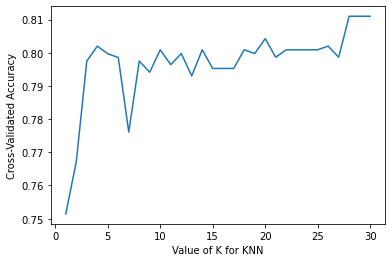

In [250]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [251]:
knn = KNeighborsClassifier(n_neighbors = 30)
pipe = make_pipeline(column_trans, knn)
cross_val_score(pipe, X, y, cv = 10, scoring='accuracy').mean()

0.8110061287027579

In [252]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [258]:
y_test_pred = pipe.predict(y_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [260]:
y_test_pred.shape

(418,)

In [264]:
outcome = pd.DataFrame(y_test_pred)
pass_id = pd.read_csv('test.csv')[['PassengerId']]
result = pd.concat([pass_id,outcome], axis=1)
result.columns = ['PassengerId','Survived']
result.to_csv('result.csv',encoding='utf-8', columns=['PassengerId','Survived'], index=False)